# Jonathan Halverson
# Thursday, July 30, 2015
# Linear regression from Intro to Statistical Learning

We consider how advertising in three different areas affects sales. We wish to create a model to predict sales based on the three modes of advertising.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Let's check for correlation:

In [4]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


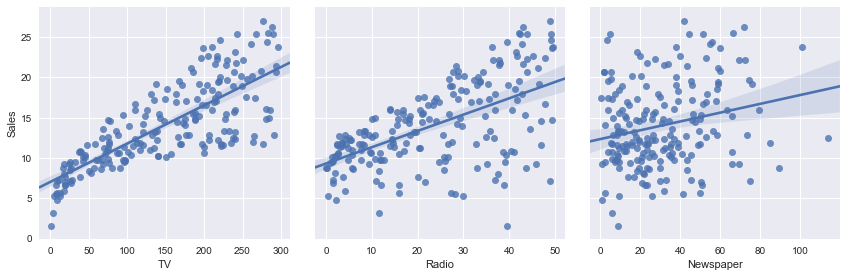

In [5]:
import seaborn as sns
%matplotlib inline
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=4, kind='reg')

Sales are affected by TV and Radio but it appears to be somewhat independent of Newspaper. Let's fit each of these and examine the p-values for the slope:

In [6]:
import statsmodels.formula.api as smf
result = smf.ols(formula='Sales ~ TV', data=data[['TV', 'Sales']]).fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 05 May 2017   Prob (F-statistic):           1.47e-42
Time:                        22:14:08   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

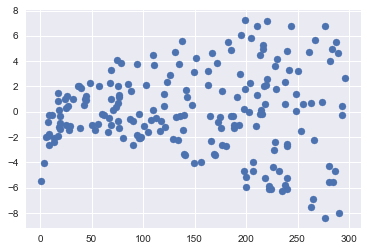

In [24]:
residuals = data.Sales - (7.0326 + 0.0475 * data.TV)
plt.scatter(data.TV, residuals)

(array([  4.,  10.,  13.,  17.,  40.,  43.,  32.,  16.,  17.,   8.]),
 array([-8.37585, -6.8163 , -5.25675, -3.6972 , -2.13765, -0.5781 ,
         0.98145,  2.541  ,  4.10055,  5.6601 ,  7.21965]),
 <a list of 10 Patch objects>)

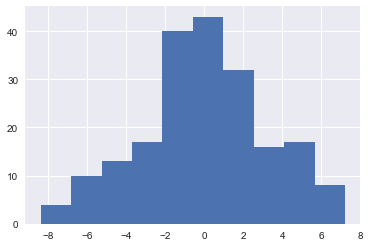

In [25]:
plt.hist(residuals)

In [26]:
from scipy.stats import anderson
a2, crit, sig = anderson(residuals, 'norm')
a2, crit, sig

(0.48941900630799751,
 array([ 0.565,  0.644,  0.772,  0.901,  1.071]),
 array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

We see that homoscedasticity is not satisfied but the residuals are normally distributed.

In [7]:
result = smf.ols(formula='Sales ~ Radio', data=data[['Radio', 'Sales']]).fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Fri, 05 May 2017   Prob (F-statistic):           4.35e-19
Time:                        22:14:08   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.0

In [8]:
result = smf.ols(formula='Sales ~ Newspaper', data=data[['Newspaper', 'Sales']]).fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Fri, 05 May 2017   Prob (F-statistic):            0.00115
Time:                        22:14:08   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.0

In [9]:
result = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 05 May 2017   Prob (F-statistic):           1.58e-96
Time:                        22:14:09   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [10]:
result = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 05 May 2017   Prob (F-statistic):           4.83e-98
Time:                        22:14:09   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

When the three predictors are taken individually we find that their slopes are each statistically significant. However, when all three are used in the model, Newspaper is not significant or it can not be distinguished from zero. Our final model to predict Sales includes only TV and Radio.

### scikit-learn classifier

Above we used StatsModels to create the regression model, but here we use scikit-learn:

In [11]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [12]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

/Users/jhalverson/software/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [14]:
from sklearn import metrics
print metrics.mean_absolute_error(y_test, y_pred)
print metrics.mean_squared_error(y_test, y_pred)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print metrics.r2_score(y_test, y_pred)

1.30801002296
2.77668213154
1.66633794038
0.90034194284


Repeat calculation with Newspaper ignored:

In [15]:
X = X.drop('Newspaper', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [16]:
linreg.fit(X_train, y_train)
y_predict = linreg.predict(X_test)

In [17]:
print np.sqrt(metrics.mean_squared_error(y_test, y_predict))
print metrics.r2_score(y_test, y_predict)

1.38790346994
0.917621494225


Below we plot the points (TV, Radio, Sales) and final model which is a plane:

In [18]:
def func(x_, y_):
    return linreg.intercept_ + x_ * linreg.coef_[0] + y_ * linreg.coef_[1]

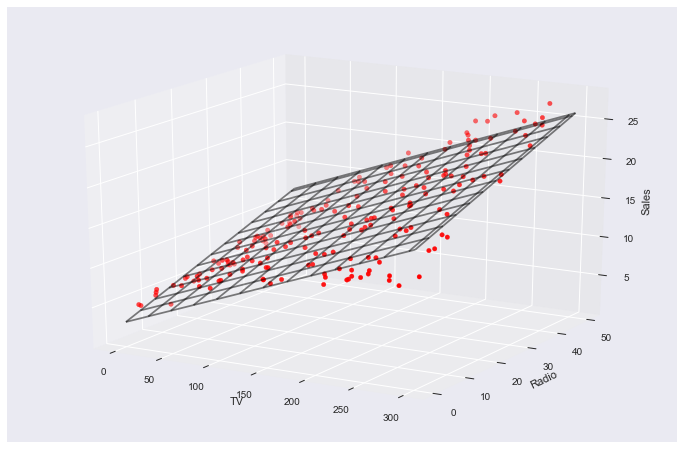

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.TV, data.Radio, data.Sales, color='r')

x = np.linspace(0, 300)
y = np.linspace(0, 50)
(X, Y) = np.meshgrid(x, y)
z = np.array([func(x,y) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = z.reshape(X.shape)
ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4, color='k', alpha=0.5)

ax.view_init(elev=20, azim=300)
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')